# **Project 2: Model Analysis Project**

**By Christian Hjorth Hansen and Jacob Mai Kaaber**

## **Introduction**

In this project we consider the consumer's choice problem with two goods and the firms maximization problem. We start by solving the consumer's problem for 2 different consumers, one with Cobb-Douglas preferences and the other with logarithmic preferences. Next, we find the social optimum for the two consumers. Lastly, we solve the firms maximization problem, where the reader can choose between the settings of a competitive market or a monopolistic market. This project is made as an interactive helping tool, such that the user can adjust the parameters to the user's function.

## **Importing necessary tools**

We start by importing the tools, which we are going to use in this project.

In [1]:
import ipywidgets as widgets #For making widgets for the income and prices
import matplotlib.pyplot as plt # For making plots
from mpl_toolkits.mplot3d import Axes3D # This addition allows us to make 3D-plots
import numpy as np # This is used, when we make graphs
from scipy import optimize # This is used for solving the consumer's problem
import warnings # We import this feature because we want to avoid printing a warning when dividing by 0
warnings.filterwarnings("ignore", category=RuntimeWarning) 

## **Consumer problems**

### **Setting the prices**

We solve the consumer problems for both consumers simultaniosly. The consumer on the left will be the one with cobb-douglas preferences and the one on the rigth is the consumer with the logarithmic preferences.

We start by implementing the two prices as widgets. There are two widgets for each variable. These are connected and will move simultaniosly, allowing for either setting the variables using the slider or writing a specific value using the text-widget.

In [3]:
# Price on good 1

# We only describe the code for the prices, as it is repeated for all variables.
# First we print a headline "Price on good 1", where the first part is used to make the text bold. We also write P1 in a parenthesis,
# as this is the variable name which we are going to use.
print('\033[1m' + 'Price on good 1 (P1)')
# Now we create the text-widget, where we set the starting value to 5.
P1 = widgets.FloatText(
value=5)
# Next we create a slide-widget (using floats, such that decimals can be used). Here we set the same starting value, 
# we set the steps to 1 and we define the minimum value to 0 and the maximum value to 100.
# This can off course be adjusted for the problem settings.
P1b = widgets.FloatSlider(
value=5,
step=1,
min=0,
max=100.0,)
# Next we print both widgets
display(P1,P1b)
# And lastly we link the 2 widgets together, so you can change either widget.
linkp1 = widgets.jslink((P1, 'value'), (P1b, 'value'))

# Price on good 2
print('\033[1m' + 'Price on good 2 (P2)')
P2 = widgets.FloatText(
value=15)
P2b = widgets.FloatSlider(
value=5,
step=1,
min=0,
max=100.0,)
display(P2,P2b)

linkp2 = widgets.jslink((P2, 'value'), (P2b, 'value'))

Price on good 1 (P1)


FloatText(value=5.0)

FloatSlider(value=5.0, step=1.0)

Price on good 2 (P2)


FloatText(value=15.0)

FloatSlider(value=5.0, step=1.0)

### **Setting the income level**

In [4]:
# Income consumer 1
print('\033[1m' + 'Income for consumer 1 (I1)')
I1 = widgets.FloatText(
value=100)
I1b = widgets.FloatSlider(
value=100,
step=1,
min=0,
max=1000,)
display(I1,I1b),

linkI1 = widgets.jslink((I1, 'value'), (I1b, 'value'))
             
# Income consumer 2
print('\033[1m' + 'Income for consumer 2 (I2)')
I2 = widgets.FloatText(
value=100)
I2b = widgets.FloatSlider(
value=100,
step=1,
min=0,
max=1000,)
display(I2,I2b)

linkI2 = widgets.jslink((I2, 'value'), (I2b, 'value'))


Income for consumer 1 (I1)


FloatText(value=100.0)

FloatSlider(value=100.0, max=1000.0, step=1.0)

Income for consumer 2 (I2)


FloatText(value=100.0)

FloatSlider(value=100.0, max=1000.0, step=1.0)

Next we plot the budget constraint, this way we are able to show, what the consumer is able to afford. To do this we first need to define the budget constraint function, whicch is
\\[
\begin{eqnarray*}
I(p_{1},p_{2}) & = & x_{1}*p_{1}+x_{2}*p_{2}
\end{eqnarray*}
\\]
And then isolate for \begin{eqnarray*} x_{2} \end{eqnarray*}

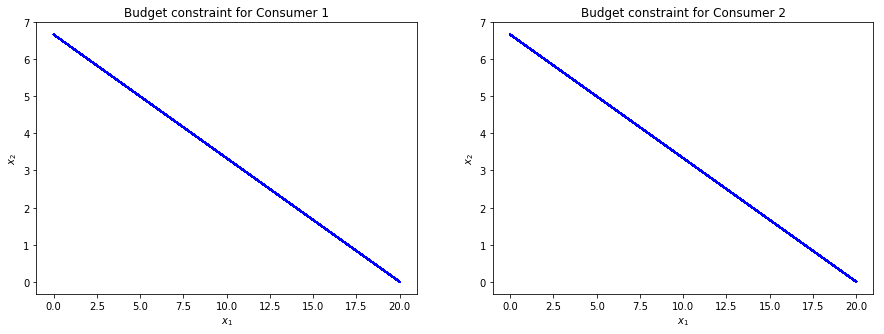

In [5]:
def x2_func(x1,I,P1,P2): # We define x2 as a function of x1
    return (I-x1*P1)/P2 # The function is derived by isolating x2 in the budgetconstraint
       
N=500
shape_tuple = (N,N)
x1_values = np.empty(shape_tuple)
if I1.value>I2.value:
    x_max1=I1.value/P1.value  
else:
    x_max1=I2.value/P1.value 
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        x1_values[i,j] = (i/(N-1))*x_max1 # in [0,x_max1]
def Figure_1():
    fig = plt.figure(figsize=(15,5)) # create the figure 
    ax = fig.add_subplot(1,2,1) # We add a subplot and place it in the top left corner
    ax.plot(x1_values,x2_func(x1_values,I1.value,P1.value,P2.value),'b'); # creates surface plot in the axis
    ax.set_xlabel('$x_1$') # add labels
    ax.set_ylabel('$x_2$') # add labels
    ax.set_title("Budget constraint for Consumer 1") # add title
    ay = fig.add_subplot(1,2,2) # We add a second plot and place it in the top right corner
    ay.plot(x1_values,x2_func(x1_values,I2.value,P1.value,P2.value),'b'); # creates surface plot in the axis
    ay.set_xlabel('$x_1$') # add labels
    ay.set_ylabel('$x_2$') # add labels
    ay.set_title("Budget constraint for Consumer 2") # add title
Figure_1()

### **Utility function**

After setting the price levels and income levels, we define the utilityfunctions. 
\\[
u_{Consumer_1}(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
\\]
\\[
u_{Consumer_2}(x_1,x_2) = \beta*log(x_1)+(1-\beta)*log(x_2)
\\]
These functions can easily be altered to fit your own problem using the widgets, which allows you to change the values of \\(\alpha\\) and \\(\beta\\) 

In [6]:
# Consumer 1
def c1_u_func(x1,x2,alpha): # We define a utility function
    return (x1**alpha)*(x2**(1-alpha))

print('\033[1m' + 'Consumer 1:')
print('\033[1m' + 'Alpha (\u03B1)') # We use this code \u03B1 and similar ones to print greek letters. This particular one is for alpha
alpha = widgets.FloatText(
value=0.5)
alphab = widgets.FloatSlider(
value=0.5,
step=0.1,
min=0,
max=1,)
display(alpha,alphab)

mylink = widgets.jslink((alpha, 'value'), (alphab, 'value'))

# Consumer 2

def c2_u_func(x1,x2,beta): # We define a utility function
    return beta*np.log(x1)+(1-beta)*np.log(x2)

print('\033[1m' + 'Consumer 2:')
print('\033[1m' + 'Beta (\u03B2)')
beta = widgets.FloatText(
value=0.5)
betab = widgets.FloatSlider(
value=0.5,
step=0.1,
min=0,
max=1,)
display(beta,betab)

mylink = widgets.jslink((beta, 'value'), (betab, 'value'))

Consumer 1:
Alpha (α)


FloatText(value=0.5)

FloatSlider(value=0.5, max=1.0)

Consumer 2:
Beta (β)


FloatText(value=0.5)

FloatSlider(value=0.5, max=1.0)

We set the utlity values so we can plot the indifference curves.

In [8]:
print('\033[1m' + 'Utility for consumer 1 (u1)')
u1 = widgets.FloatText(
value=10)
u1b = widgets.FloatSlider(
value=10,
step=0.1,
min=0,
max=50,)
display(u1,u1b)
mylink = widgets.jslink((u1, 'value'), (u1b, 'value'))

print('\033[1m' + 'Utility for consumer 2 (u2)')
u2 = widgets.FloatText(
value=1)
u2b = widgets.FloatSlider(
value=1,
step=0.1,
min=0,
max=3,)
display(u2,u2b)
mylink = widgets.jslink((u2, 'value'), (u2b, 'value'))

Utility for consumer 1 (u1)


FloatText(value=10.0)

FloatSlider(value=10.0, max=50.0)

Utility for consumer 2 (u2)


FloatText(value=1.0)

FloatSlider(value=1.0, max=3.0)

Next we plot the utilityfunctions using the values choosen above.

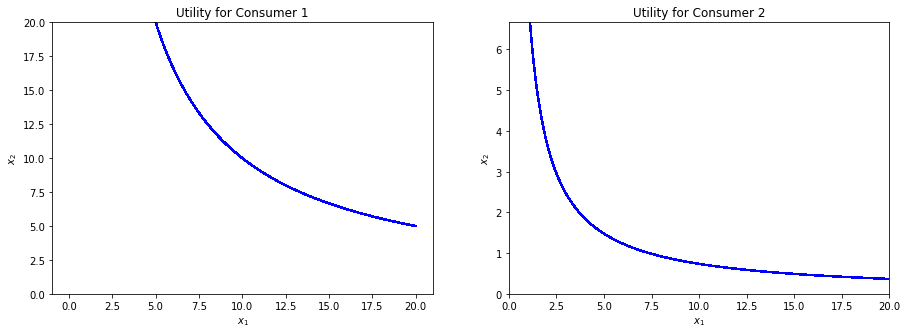

In [9]:
def c1_x2_func2(x1,u,alpha):
    return u**(1/(1-alpha))*(x1**(-alpha/(1-alpha)))
def c2_x2_func2(x1,u,beta):
    return np.exp((u-beta*np.log(x1))/(1-beta))

def Figure_2():
    fig = plt.figure(figsize=(15,5)) # creates the figure
    ax = fig.add_subplot(1,2,1) # creates subplot 
    ax.plot(x1_values,c1_x2_func2(x1_values,u1.value,alpha.value),'b'); # creates surface plot in the axis
    ax.set_xlabel('$x_1$') # add labels
    ax.set_ylabel('$x_2$') # add labels
    ax.set_title("Utility for Consumer 1") # add title
    ax.set_ylim([0, 20]) # here we limit the y axis, which is needed due to the values going towards negative infinity, when x1 goes towards 0.
    ay = fig.add_subplot(1,2,2) # creates subplot 
    ay.plot(x1_values,c2_x2_func2(x1_values,u2.value,beta.value),'b'); # creates surface plot in the axis, but this time we use a different method due to the fact that we are using numpy functions (exp and log).
    ay.set(xlabel='$x_1$', ylabel='$x_2$',
       title="Utility for Consumer 2", xlim=[0,I2.value/P1.value], ylim=[0,I2.value/P2.value]) # We also need to set our labels and title in a different way.
Figure_2()

### **Solution**

Now we solve the consumer's problem for both types. This is done by maximizing the utility with regards to the budget constraint.
\\[
\begin{eqnarray*}
\max_{x_{1},x_{2}}u(x_{1},x_{2})\\
\text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq & I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq & 0
\end{eqnarray*}
\\]

In [10]:
def c1(x1,I,P1,P2,alpha): # First we define a function, which we will use to find the optimal value of x1. *****************************************************************
    x2 = (I-P1*x1)/P2
# We return the negative function of our utility and then minimizes this, which is the same as maximizing the utility
    return -c1_u_func(x1,x2,alpha) 

def c2(x1,I,P1,P2,beta):
    x2 = (I-P1*x1)/P2
    return -c2_u_func(x1,x2,beta)

# Next we use our optimizing function to maximize the utility. 
# Here we define x1 to be between 0 and the maximum number of good 1 you can buy for your income
solver_c1 = optimize.minimize_scalar(c1, method='bounded', bounds=(0,I1.value/P1.value), args=(I1.value,P1.value,P2.value,alpha.value))  
solver_c2 = optimize.minimize_scalar(c2, method='bounded', bounds=(0,I2.value/P1.value), args=(I2.value,P1.value,P2.value,beta.value)) 
# We then define our answers for both consumers
c1_x1 = solver_c1.x
c1_x2 = (I1.value-P1.value*c1_x1)/P2.value
c1_u = c1_u_func(c1_x1,c1_x2,alpha.value)

c2_x1 = solver_c2.x
c2_x2 = (I2.value-P1.value*c2_x1)/P2.value
c2_u = c2_u_func(c2_x1,c2_x2,beta.value)

This provides the following results:

In [11]:
print('\033[1m' + 'Consumer 1:')
print('\033[0m' + f'x1 = {c1_x1:.1f}') # Prints the x1 value
print(f'x2 = {c1_x2:.1f}') # Prints the x2 value
print(f'u  = {c1_u:.2f}') # Prints the utility
print(f'I-p1*x1-p2*x2 = {I1.value-P1.value*c1_x1-P2.value*c1_x2:.2f}') # Prints a calculation to see whether the whole income has been used, such that income - consumption = 0 
print ('')
print('\033[1m' + 'Consumer 2:')
print('\033[0m' + f'x1 = {c2_x1:.1f}') 
print(f'x2 = {c2_x2:.1f}') 
print(f'u  = {c2_u:.2f}') 
print(f'I-p1*x1-p2*x2 = {I2.value-P1.value*c2_x1-P2.value*c2_x2:.2f}') 

Consumer 1:
x1 = 10.0
x2 = 3.3
u  = 5.77
I-p1*x1-p2*x2 = 0.00

Consumer 2:
x1 = 10.0
x2 = 3.3
u  = 1.75
I-p1*x1-p2*x2 = 0.00


We can compare this answer to the one, we get from solving the problem manually.

**Consumer 1:**
\\[
\begin{eqnarray*}
x_1^{\ast} &=& \alpha \frac{I}{p_1} \\
x_2^{\ast} &=& (1-\alpha) \frac{I}{p_2}\\
u^{\ast} &=& u_{Consumer_1}(x_1^{\ast},x_2^{\ast})
\end{eqnarray*}
\\]

**Consumer 2:**
\\[
\begin{eqnarray*}
x_1^{\ast} &=& \beta \frac{I}{p_1} \\
x_2^{\ast} &=& (1-\beta) \frac{I}{p_2}\\
u^{\ast} &=& u_{Consumer_2}(x_1^{\ast},x_2^{\ast})
\end{eqnarray*}
\\]

In [12]:
print('\033[1m' + 'Consumer 1:')
print('\033[0m' + f'x1 = {alpha.value*I1.value/P1.value:.1f}') # Prints the x1 value
print(f'x2 = {(1-alpha.value)*I1.value/P2.value:.1f}') # Prints the x2 value
print(f'u  = {c1_u_func(alpha.value*I1.value/P1.value,(1-alpha.value)*I1.value/P2.value,alpha.value):.2f}') # Prints the utility
print ('')
print('\033[1m' + 'Consumer 2:')
print('\033[0m' + f'x1 = {beta.value*I2.value/P1.value:.1f}') 
print(f'x2 = {(1-beta.value)*I2.value/P2.value:.1f}') 
print(f'u  = {c2_u_func(beta.value*I2.value/P1.value,(1-beta.value)*I2.value/P2.value,beta.value):.2f}') 

Consumer 1:
x1 = 10.0
x2 = 3.3
u  = 5.77

Consumer 2:
x1 = 10.0
x2 = 3.3
u  = 1.75


We can also visualize this by plotting our budget constraint against the utility function, where we use the results from above.

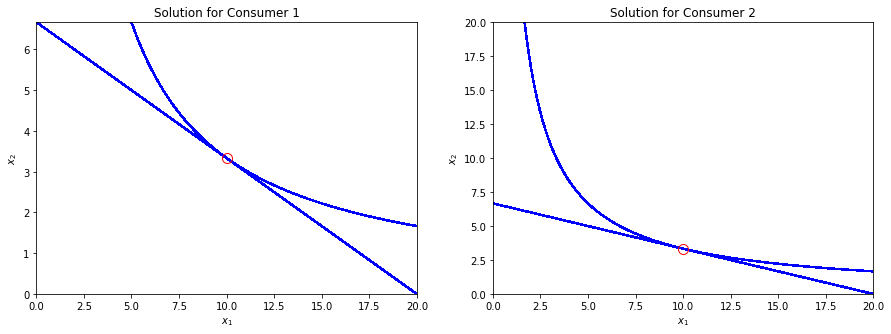

In [13]:
def Figure_3():
    fig = plt.figure(figsize=(15,5))  
    ax = fig.add_subplot(1,2,1)
    ax.plot(x1_values,c1_x2_func2(x1_values,c1_u,alpha.value),'b');
    ax.plot(x1_values,x2_func(x1_values,I1.value,P1.value,P2.value),'b');
    ax.set_xlabel('$x_1$') 
    ax.set_ylabel('$x_2$') 
    ax.set_title("Solution for Consumer 1") 
    ax.set_ylim([0, I1.value/P2.value])
    ax.set_xlim([0,I1.value/P1.value])
    ax.plot(c1_x1,c1_x2, color='red', marker='o', linestyle='dashed', linewidth=5, markersize=10, fillstyle='none') 
    ay = fig.add_subplot(1,2,2)
    ay.plot(x1_values,c2_x2_func2(x1_values,c2_u,beta.value),'b'); 
    ay.plot(x1_values,x2_func(x1_values,I2.value,P1.value,P2.value),'b')
    ay.set(xlabel='$x_1$', ylabel='$x_2$',
       title="Solution for Consumer 2", xlim=[0,I2.value/P1.value], ylim=[0,20]) 
    ay.plot(c1_x1, c1_x2, color='red', marker='o', linestyle='dashed', linewidth=5, markersize=10, fillstyle='none')
Figure_3()

We see that the utility function touches the budget constraint (shown by the red circle) at the result we found above.

## **Social optimum**

First we define the necessary aggregated variables

In [15]:
soc_I=I1.value+I2.value
def u_func(x1,x2,alpha,beta):
    return c1_u_func(x1,x2,alpha)+c2_u_func(x1,x2,beta)

And then we solve for the social optimum: 

\\[
\begin{eqnarray*}
\max_{x_{1},x_{2}}u_{Consumer_1}(x_{1},x_{2})+u_{Consumer_2}(x_{1},x_{2})\\
\text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq & I_{Consumer_1}+I_{Consumer_2},\,\,\,p_{1},p_{2},I_{Consumer_1},I_{Consumer_2}>0\\
x_{1},x_{2} & \geq & 0
\end{eqnarray*}
\\]

**Notice:** We dont plot the graphs since isolateing \\(x_2\\) isn't possible for costumer 2.

In [16]:
def c1_and_c2(x1,I,P1,P2,alpha,beta): 
    x2 = (I-P1*x1)/P2
    return -u_func(x1,x2,alpha,beta)

solver = optimize.minimize_scalar(c1_and_c2, method='bounded', bounds=(0,soc_I/P1.value), args=(soc_I,P1.value,P2.value,alpha.value,beta.value)) 
soc_x1 = solver.x
soc_x2 = (soc_I-P1.value*soc_x1)/P2.value
soc_u = u_func(soc_x1,soc_x2,alpha.value,beta.value)

print('\033[1m' + 'Social optimum:')
print('\033[0m' + f'x1 = {soc_x1:.1f}')
print(f'x2 = {soc_x2:.1f}') 
print(f'u  = {soc_u:.2f}') 
print(f'I-p1*x1-p2*x2 = {soc_I-P1.value*soc_x1-P2.value*soc_x2:.2f}') 

Social optimum:
x1 = 20.0
x2 = 6.7
u  = 13.99
I-p1*x1-p2*x2 = 0.00


We can then compare this result to our earlier results from solving the consumer problems individually. We see that the changes is given by:

In [18]:
print('\033[1m' + 'Changes:')
print('\033[0m' + f'\u0394x1 = {soc_x1-c1_x1-c2_x1:.1f}') 
print(f'\u0394x2 = {soc_x2-c1_x2-c2_x2:.1f}') 
print(f'\u0394u = {soc_u-c1_u-c2_u:.2f}')

Changes:
Δx1 = 0.0
Δx2 = 0.0
Δu = 6.47


## **Firms maximization problem**

 ### **Determine the competitive situation**

First we need to select the competitive situation of the problem.

In [20]:
competition=widgets.RadioButtons(
    options=['Competitive', 'Monopolistic'],
    value='Competitive',
    description='Competition:',
    disabled=False
)
competition

RadioButtons(description='Competition:', options=('Competitive', 'Monopolistic'), value='Competitive')

### **Set demand according to the competition**

In [22]:
if ('Competitive'==competition.value): # This is the start of an if statement, which checks which form of competition was choosen.
    print('Since you have picked the competitive market, you need to choose the price, p, at which the other firms sell their goods')
    print('')
    print('\033[1m' + 'Price on goods (P)')
    P = widgets.FloatText(
    value=15)
    Pb = widgets.FloatSlider(
    value=5,
    step=1,
    min=0,
    max=100.0,)
    display(P,Pb)
    linkP = widgets.jslink((P, 'value'), (Pb, 'value'))

else:
    print('Since you have picked monopolistic competition, we need to define the demand function of the consumer. Here we use a linear function (D(x)=b-a*x), where the slope, a, and the constant term, b, are determined by the widgets below.')
    print('')
    # Determine a
    print('\033[1m' + 'Slope of demand function (a)')
    a = widgets.FloatText(
    value=5)
    aa = widgets.FloatSlider(
    value=5,
    step=0.5,
    min=0,
    max=10.0,)
    display(a,aa)
    linka = widgets.jslink((a, 'value'), (aa, 'value'))

    # Determine b
    print('\033[1m' + 'Constant term (b)')
    b = widgets.FloatText(    
    value=200)
    bb = widgets.FloatSlider(
    value=200,
    step=1,
    min=0,
    max=500.0,)
    display(b,bb)
    linkb = widgets.jslink((b, 'value'), (bb, 'value'))
    # Note that we don't define the demand function yet since the user need to be able to change the variables first. Therefore, we define the demand function, when solving the problem

Since you have picked the competitive market, you need to choose the price, p, at which the other firms sell their goods

Price on goods (P)


FloatText(value=15.0)

FloatSlider(value=5.0, step=1.0)

### **Define the Total Cost function**

Next we define our total cost function, which is defined in a quadratic form. (We have included total cost, as it is needed to determine whether the firm wants to enter the market or not)

\\[
TC(x) = c*x^2+FC
\\]

In [23]:
# Determine variable costs
print('\033[1m' + 'Slope, c')
c = widgets.FloatText(
value=0.5)
cb = widgets.FloatSlider(
value=0.5,
step=0.1,
min=0,
max=10.0,)
display(c,cb)
linkb = widgets.jslink((c, 'value'), (cb, 'value'))
    
# Determine fixed costs
print('\033[1m' + 'Fixed costs (FC)')
FC = widgets.FloatText(
value=10)
FCb = widgets.FloatSlider(
value=10,
step=1,
min=0,
max=100.0,)
display(FC,FCb)
linkb = widgets.jslink((FC, 'value'), (FCb, 'value'))   

Slope, c


FloatText(value=0.5)

FloatSlider(value=0.5, max=10.0)

Fixed costs (FC)


FloatText(value=10.0)

FloatSlider(value=10.0, step=1.0)

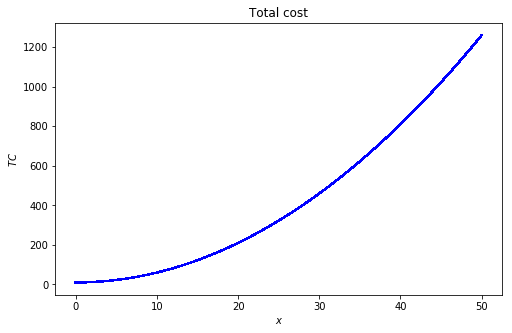

In [25]:
def TC(x,c,FC):
    return c*x**2+FC
def MC(x,c):
    return c*x*2

p_x_max=50 # Here set the capacity limit at 50
shape_tuple = (N,N)
p_x_values = np.empty(shape_tuple)

for i in range(N): 
    for j in range(N): 
        p_x_values[i,j] = (i/(N-1))*p_x_max 

def Figure_7():
    fig = plt.figure(figsize=(8,5))  
    ax = fig.add_subplot(1,1,1)
    ax.plot(p_x_values,TC(p_x_values,c.value,FC.value), 'b'); 
    ax.set_xlabel('$x$') 
    ax.set_ylabel('$TC$') 
    ax.set_title('Total cost')
Figure_7()

### **Solution**

We now solve the maximization problem by maximizing the porfit of the firm.
And since you have choosen the competitive market. The profit function of the firm is π=p*x-TC(x)
The results are:
x = 15.0
Price = 15.0
π = 102.5
Total cost  = 122.5
Revenue  = 225.0

We can also show this result by plotting the marginal cost against the marginal revenue. The marginal costs is the first derivative
of the total cost function. This means MC(x)=2*VC*x. The marginal revenue is equal to the price level, p. This gives us the following plot.
It shows that for MR=MC, the firm maximizes its profit.


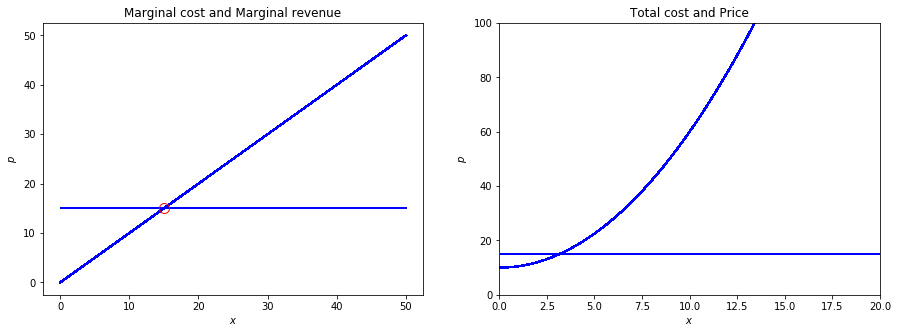

In [27]:
print('We now solve the maximization problem by maximizing the profit of the firm.')
if ('Competitive'==competition.value):
    print('And since you have choosen the competitive market. The profit function of the firm is \u03C0=p*x-TC(x)')
elif ('Monopolistic'==competition.value):
    print('And since you have choosen the monopolistic market. The profit function of the firm is \u03C0=D(x)*p-TC(x)')

if ('Competitive'==competition.value):
    def pi_competitive(x,P,c,FC):
        return -(P*x-TC(x,c,FC)) # Here we define pi as the profit times -1, so that we can use scipy optimize
    
    solver4 = optimize.minimize_scalar(pi_competitive, method='bounded', bounds=(0,p_x_max), args=(P.value,c.value,FC.value)) 
    
    # We define our answers as
    x_opt1 = solver4.x
    price1 = P.value
    pi1=P.value*x_opt1-TC(x_opt1,c.value,FC.value)
    TC1 = TC(x_opt1,c.value,FC.value)
    REV1  = P.value*x_opt1
    print('The results are:')
    print(f'x = {x_opt1:.1f}')
    print(f'Price = {P.value:.1f}')
    print(f'\u03C0 = {pi1:.1f}') 
    print(f'Total cost  = {TC1:.1f}') 
    print(f'Revenue  = {REV1:.1f}') 
    
    if pi1>-FC.value and pi1<0: # We define an if statement to check, whether the firm wants to produce anything.
        print('')
        print('Although the profit is negative, the firm will still produce since they must cover some of the fixed costs')
    elif pi1<-FC.value:
        print('Since the profit is less than the fixed costs, the firm would not produce anything, as this will lower their profits')
    
    print('')
    print('We can also show this result by plotting the marginal cost against the marginal revenue. The marginal costs is the first derivative')
    print('of the total cost function. This means MC(x)=2*VC*x. The marginal revenue is equal to the price level, p. This gives us the following plot.') 
    print('It shows that for MR=MC, the firm maximizes its profit.')
    def MR1(x,P):
        return P*x/x
    def Figure_8():
        fig = plt.figure(figsize=(15,5)) 
        ax = fig.add_subplot(1,2,1)
        ax.plot(p_x_values,MR1(p_x_values,P.value),'b'); 
        ax.plot(p_x_values,MC(p_x_values,c.value),'b')
        ax.set_xlabel('$x$') 
        ax.set_ylabel('$p$') 
        ax.set_title('Marginal cost and Marginal revenue')
        ax.plot(x_opt1, P.value, color='red', marker='o', linestyle='dashed', linewidth=5, markersize=10, fillstyle='none')
        ay = fig.add_subplot(1,2,2)
        ay.plot(p_x_values,TC(p_x_values,c.value,FC.value),'b');
        ay.plot(p_x_values,P.value*p_x_values/p_x_values,'b');
        ay.set_xlabel('$x$')
        ay.set_ylabel('$p$')
        ay.set_title('Total cost and Price')
        ay.set_xlim(0,20)
        ay.set_ylim(0,100)
    Figure_8()    
    

    
elif ('Monopolistic'==competition.value):
    def pi_monopolistic(x,b,a,c,FC):
        return -((b-a*x)*x-TC(x,c,FC)) # Here we define pi as the profit times -1, so that we can use scipy optimize
    
    solver5 = optimize.minimize_scalar(pi_monopolistic, method='bounded', bounds=(0,p_x_max), args=(b.value,a.value,c.value,FC.value))
    
    def MR2(x,b,a):
        return b-2*a*x
    
    # We define our answers as
    x_opt2 = solver5.x 
    price2 = b.value-a.value*x_opt2
    pi2=(b.value-a.value*x_opt2)*x_opt2-TC(x_opt2,c.value,FC.value)
    TC2 = TC(x_opt2,c.value,FC.value)
    REV2  = (b.value-a.value*x_opt2)*x_opt2
    print('The results are:')
    print(f'x = {x_opt2:.1f}')
    print(f'Price = {price2:.1f}')
    print(f'\u03C0 = {pi2:.1f}') 
    print(f'Total cost = {TC2:.1f}') 
    print(f'Revenue = {REV2:.1f}') 
    
    if pi2>-FC.value and pi2<0:
        print('')
        print('Although the profit is negative, the firm will still produce since they must cover some of the fixed costs')
    elif pi2<-FC.value and pi2<0:
        print('Since the profit is less than the fixed costs, the firm would not produce anything, as this will lower their profits')
    
    print('')
    print('We can also show this result by plotting the marginal cost against the marginal revenue. The marginalcosts is the first derivative')
    print('of the total cost. This means MC(x)=2*c*x. The marginal revenue is equal to MR(x)=b-2*a*x.')
    print('When plotting this, we notice that when MR=MC, the firm maximizes its profit.')
    print('And as they have monopolly, they find the optimal value of x, when MR=MC, and sets the optimal price on the demand function according to this.')
    
    def Figure_9():
        fig = plt.figure(figsize=(15,5)) # creates the figure 
        ax = fig.add_subplot(1,2,1)
        ax.plot(p_x_values,b.value-a.value*p_x_values, 'b' ); 
        ax.plot(p_x_values,MC(p_x_values,c.value), 'r');
        ax.plot(p_x_values,MR2(p_x_values,b.value,a.value), 'r');
        ax.plot(x_opt2, MR2(x_opt2,b.value,a.value), color='blue', marker='*', linestyle='dashed', linewidth=5, markersize=10, fillstyle='full')
        ax.plot(x_opt2, b.value-a.value*x_opt2, color='red', marker='o', linestyle='dashed', linewidth=5, markersize=10, fillstyle='full')
        ax.vlines(x=x_opt2, ymin=0, ymax=price2) # This code plots a vertical line at the optimal value of x
        ax.set_xlabel('$x$') 
        ax.set_ylabel('$p$') 
        ax.set_ylim(0,b.value)
        ax.set_xlim(0,b.value/a.value)
        ax.set_title('Marginal cost and Marginal revenue')
        ay = fig.add_subplot(1,2,2)
        ay.plot(p_x_values,TC(p_x_values,c.value,FC.value),'b');
        ay.plot(p_x_values,b.value-a.value*p_x_values,'b')
        ay.set_xlabel('$x$')
        ay.set_ylabel('$p$')
        ay.set_title('Total cost and Demand function')
        ay.set_ylim(0,b.value)
        ay.set_xlim(0,b.value/a.value)
    Figure_9()